## Cremona

(365,) 365
Ammonia
Test MSE: 3.136
Test MAE: 2.031
Test R2: 0.274


/var/folders/pn/sswhj3651l545xrjmmzd77_h0000gn/T/ipykernel_12156/3985621328.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


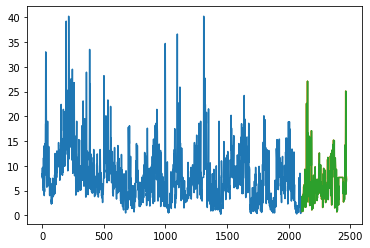

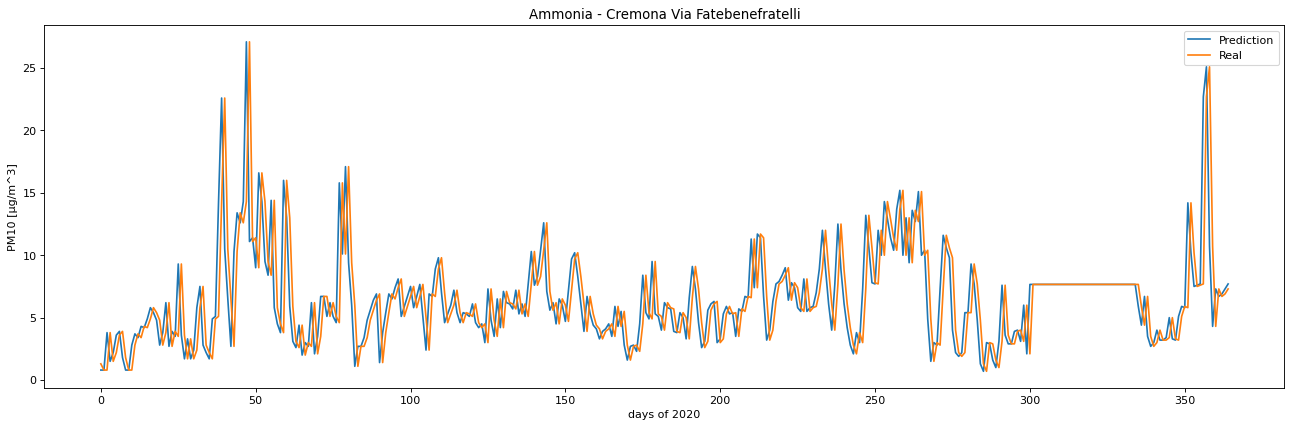

/var/folders/pn/sswhj3651l545xrjmmzd77_h0000gn/T/ipykernel_12156/3985621328.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


(365,) 365
CO
Test MSE: 0.106
Test MAE: 0.075
Test R2: 0.762


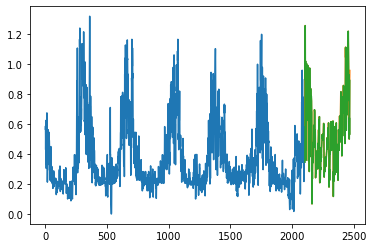

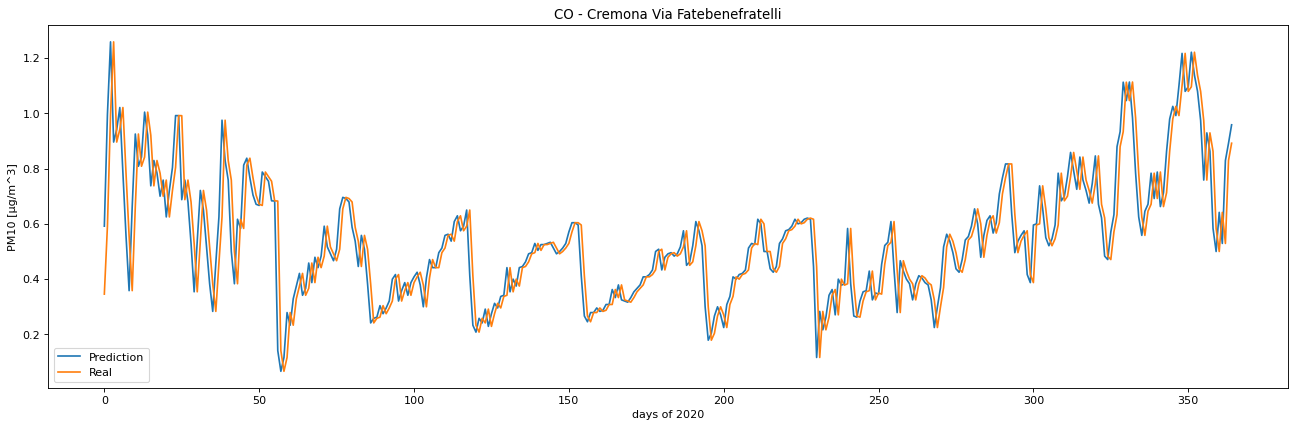

(365,) 365
NO2
Test MSE: 6.661
Test MAE: 4.953
Test R2: 0.677


/var/folders/pn/sswhj3651l545xrjmmzd77_h0000gn/T/ipykernel_12156/3985621328.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


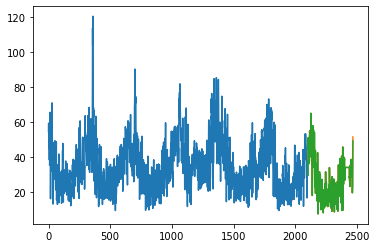

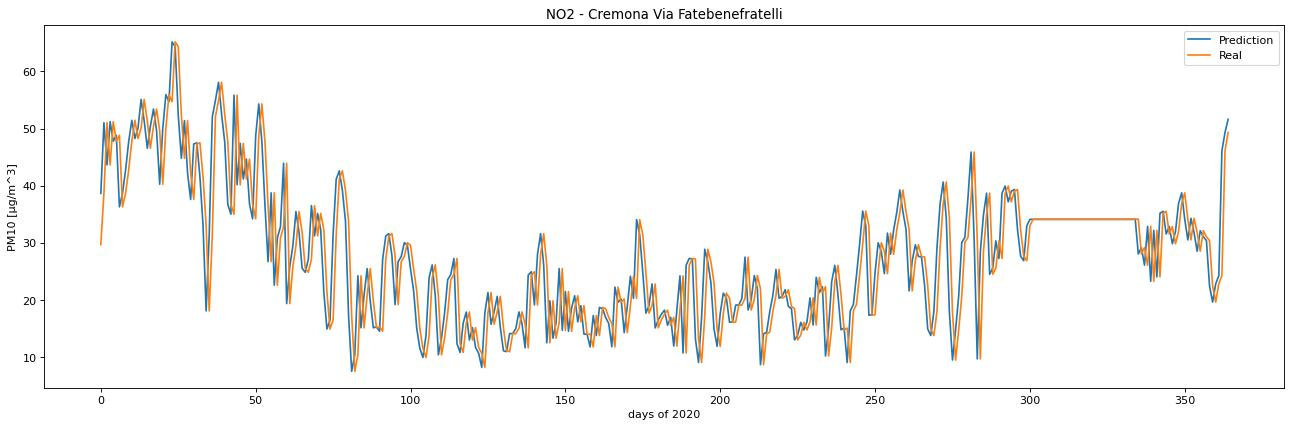

(365,) 365
NOx
Test MSE: 21.742
Test MAE: 13.740
Test R2: 0.700


/var/folders/pn/sswhj3651l545xrjmmzd77_h0000gn/T/ipykernel_12156/3985621328.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


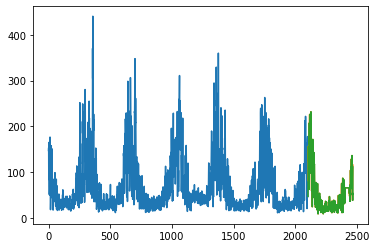

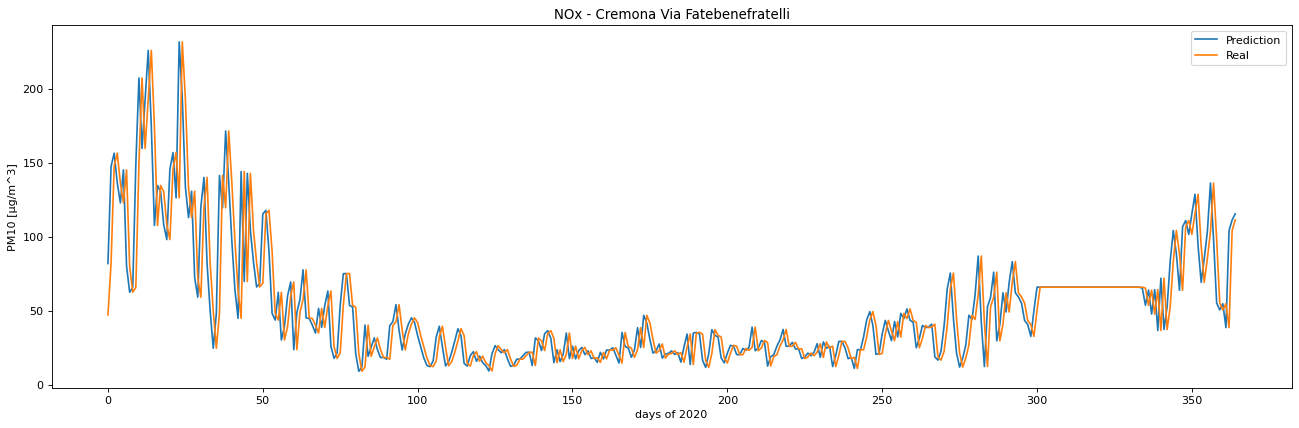

(365,) 365
Ozone
Test MSE: 10.223
Test MAE: 7.594
Test R2: 0.893


/var/folders/pn/sswhj3651l545xrjmmzd77_h0000gn/T/ipykernel_12156/3985621328.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


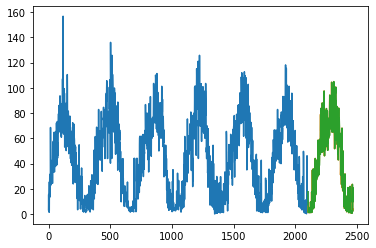

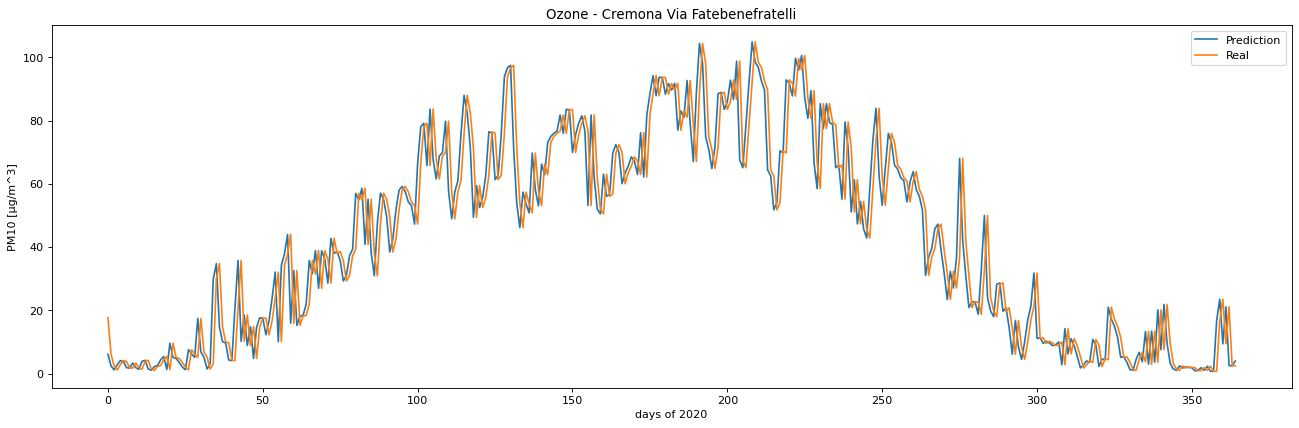

(365,) 365
PM10
Test MSE: 13.752
Test MAE: 9.862
Test R2: 0.559


/var/folders/pn/sswhj3651l545xrjmmzd77_h0000gn/T/ipykernel_12156/3985621328.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


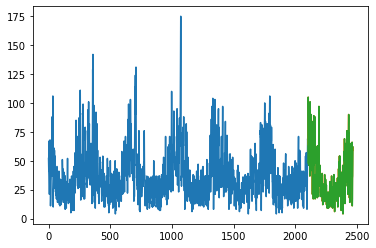

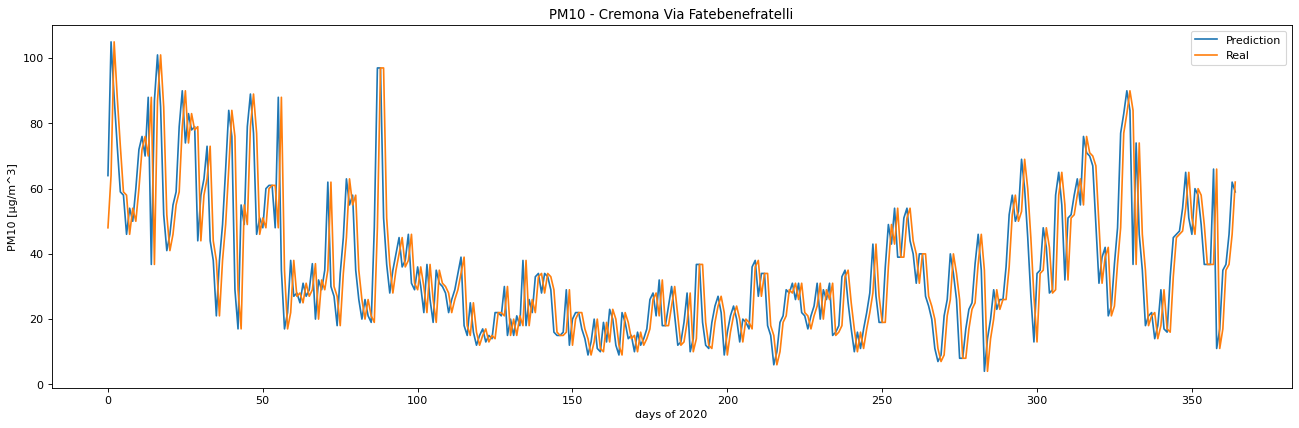

(365,) 365
PM25
Test MSE: 12.032
Test MAE: 8.118
Test R2: 0.534


/var/folders/pn/sswhj3651l545xrjmmzd77_h0000gn/T/ipykernel_12156/3985621328.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


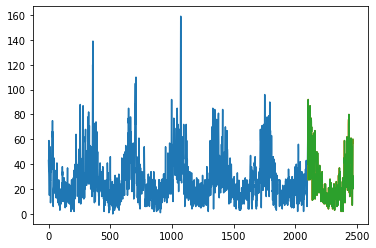

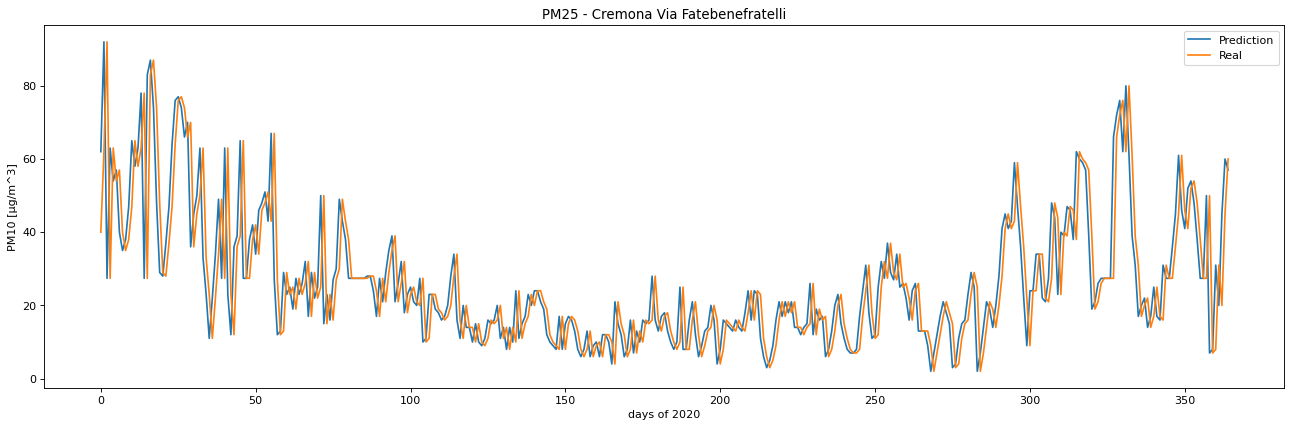

/var/folders/pn/sswhj3651l545xrjmmzd77_h0000gn/T/ipykernel_12156/3985621328.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


(365,) 365
Sulfur_dioxide
Test MSE: 0.689
Test MAE: 0.445
Test R2: 0.177


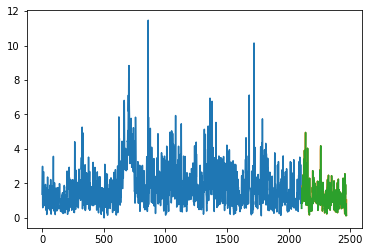

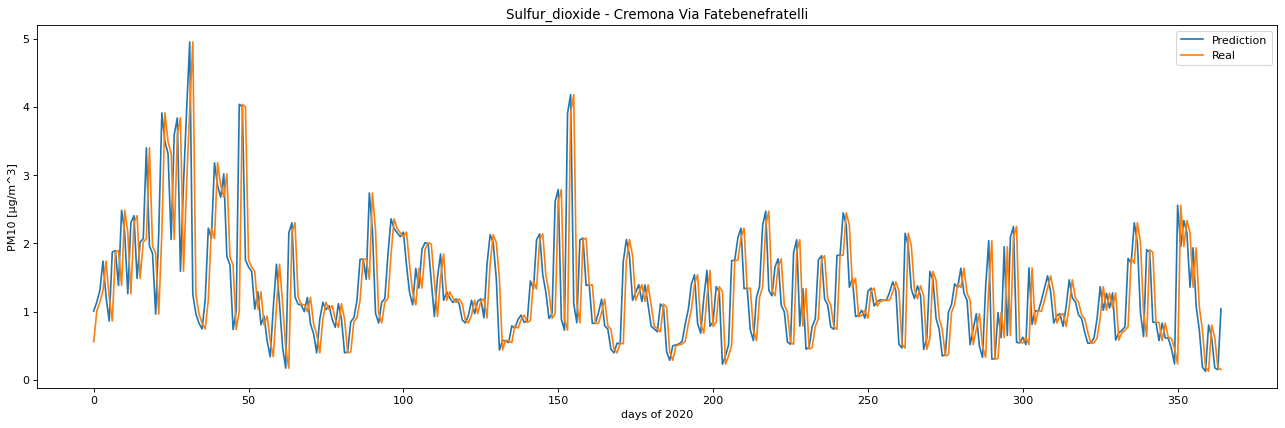

/var/folders/pn/sswhj3651l545xrjmmzd77_h0000gn/T/ipykernel_12156/3985621328.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


(365,) 365
Wind_speed
Test MSE: 0.476
Test MAE: 0.326
Test R2: -0.493


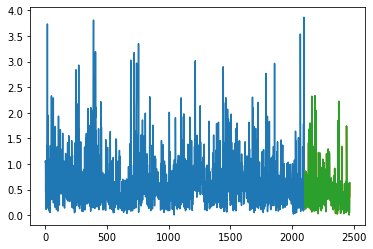

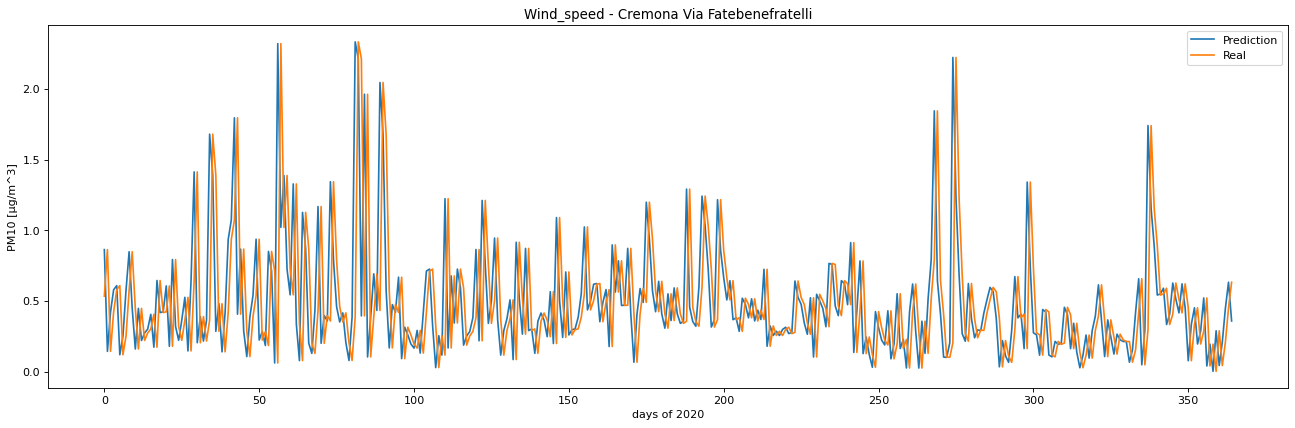

/var/folders/pn/sswhj3651l545xrjmmzd77_h0000gn/T/ipykernel_12156/3985621328.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


(365,) 365
Temperature
Test MSE: 1.796
Test MAE: 1.360
Test R2: 0.952


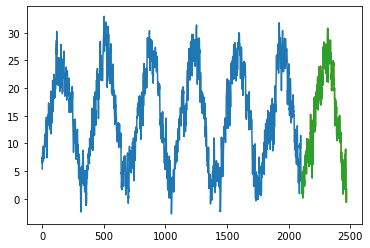

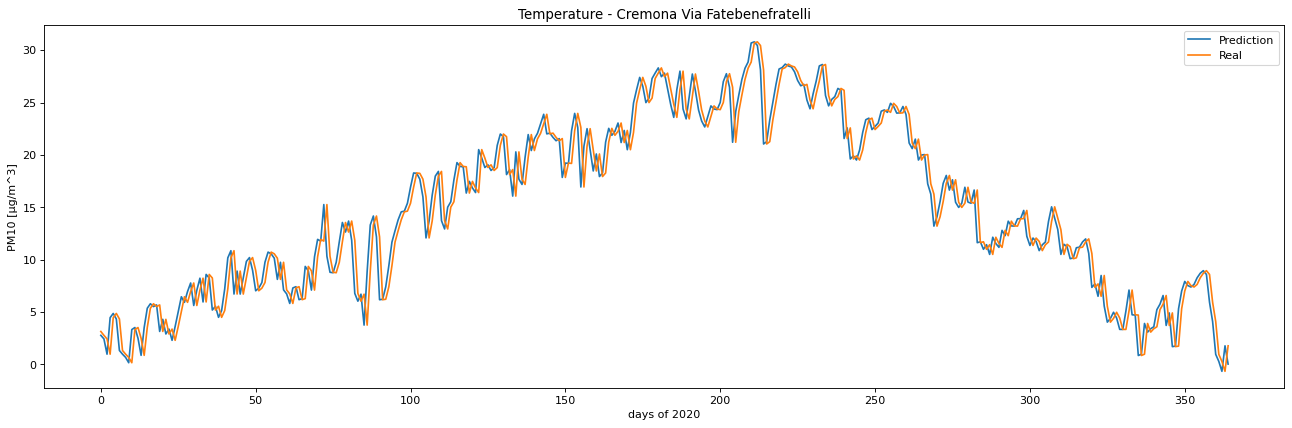

/var/folders/pn/sswhj3651l545xrjmmzd77_h0000gn/T/ipykernel_12156/3985621328.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


(365,) 365
Relative_humidity
Test MSE: 10.403
Test MAE: 6.948
Test R2: 0.666


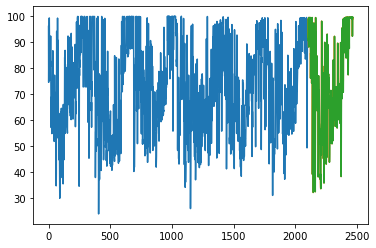

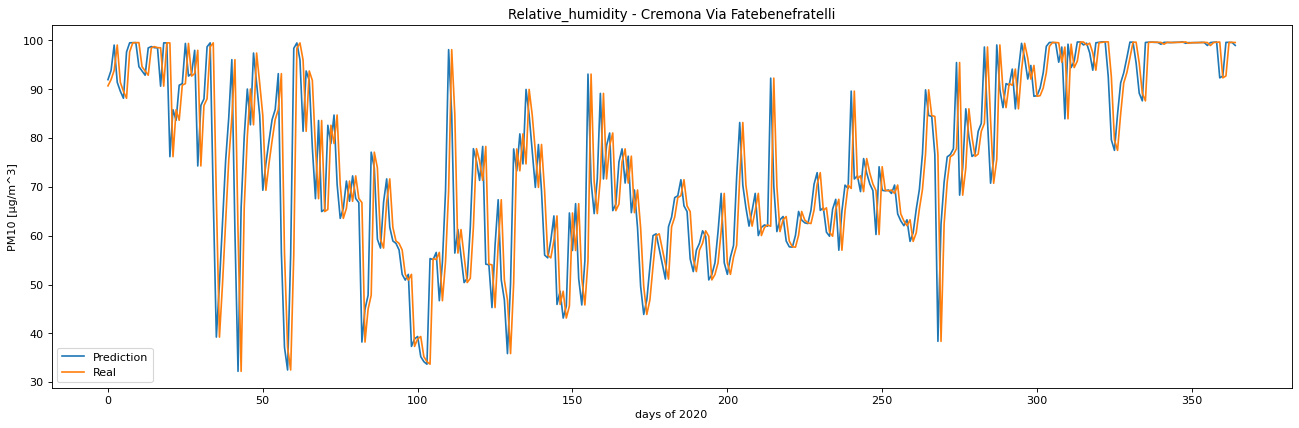

/var/folders/pn/sswhj3651l545xrjmmzd77_h0000gn/T/ipykernel_12156/3985621328.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


(365,) 365
Global_radiation
Test MSE: 58.802
Test MAE: 38.464
Test R2: 0.662


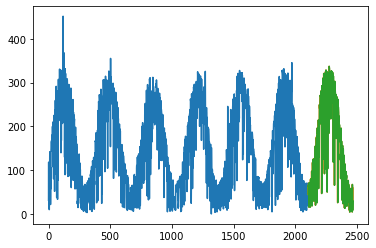

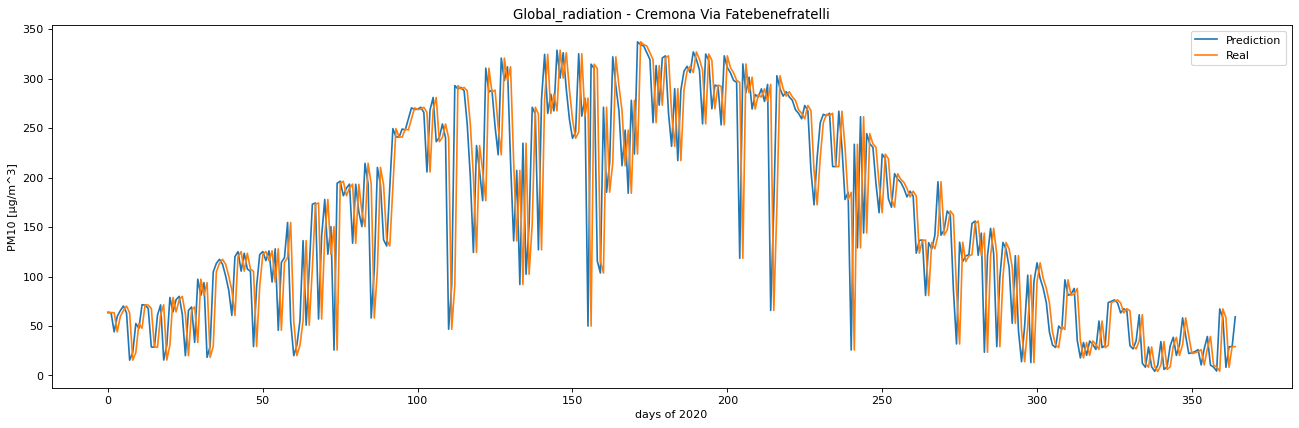

/var/folders/pn/sswhj3651l545xrjmmzd77_h0000gn/T/ipykernel_12156/3985621328.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


(365,) 365
Rainfall
Test MSE: 6.575
Test MAE: 2.389
Test R2: -0.787


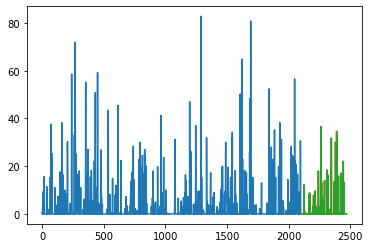

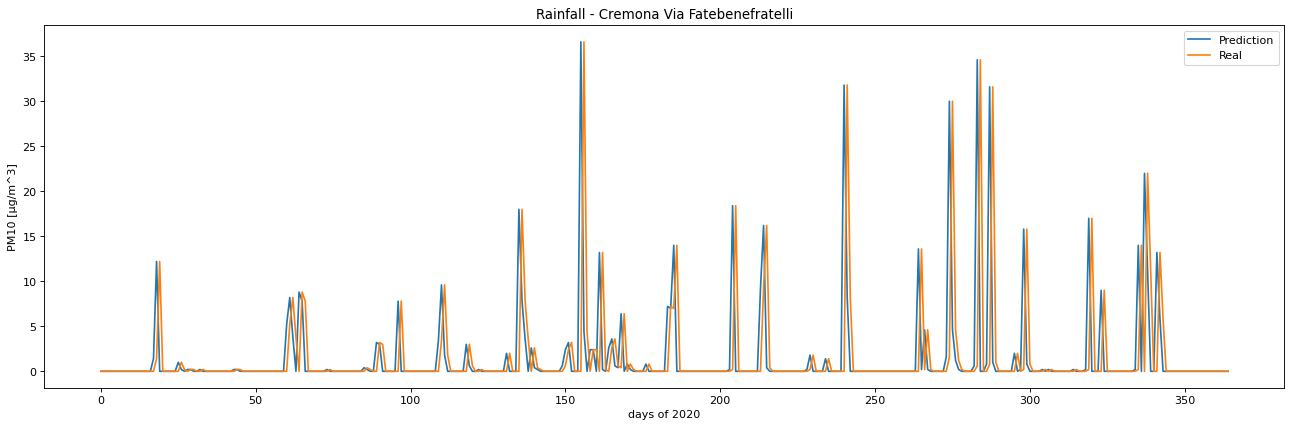

In [2]:
for i in range(4,17):
  from pandas import read_csv
  from pandas import datetime
  from pandas import DataFrame
  from pandas import concat
  from matplotlib import pyplot
  from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score


  series = read_csv('/Users/davidguzman/Downloads/QuadrantiCremona.csv')

  #find splitting points 

  date_validation_split = '2018-12-31'
  date_test_split = '2019-12-31'

  validation_vector = series.iloc[:,3].apply(lambda x: x.startswith(date_validation_split))
  validation_index =  series[validation_vector].index[0]

  test_vector = series.iloc[:,3].apply(lambda x: x.startswith(date_test_split))
  test_index =  series[test_vector].index[0]

  # Create lagged dataset 
  series = series.iloc[:,i]
  #series = series.dropna()
  series = series.fillna(series.mean())
      
  values = DataFrame(series.values)
  dataframe = concat([values.shift(1), values], axis=1)
  dataframe.columns = ['t-1', 't+1']

  # split into train and test sets
  X = dataframe.values
  #train_size = int(len(X) * 0.66)
  train_size = test_index
  train, test = X[1:train_size], X[train_size:]
  train_X, train_y = train[:,0], train[:,1]
  test_X, test_y = test[:,0], test[:,1]

  # persistence model
  def model_persistence(x):
    return x

  # walk-forward validation
  predictions = list()
  for x in test_X:
    yhat = model_persistence(x)
    predictions.append(yhat)
  MSE = mean_squared_error(test_y, predictions, squared = False)
  MAE = mean_absolute_error(test_y, predictions)
  R2 = r2_score(test_y, predictions)
  print(test_y.shape, len(predictions))
  print(series.name)
  print('Test MSE: %.3f' % MSE)
  print('Test MAE: %.3f' % MAE)
  print('Test R2: %.3f' % R2)

  # plot predictions and expected results
  pyplot.plot(train_y)
  pyplot.plot([None for i in train_y] + [x for x in test_y])
  pyplot.plot([None for i in train_y] + [x for x in predictions])

  from matplotlib.pyplot import figure
  figure(figsize=(20, 6), dpi=80)

  pyplot.plot(series[train_size:].reset_index().iloc[:,1], label = 'Prediction')
  pyplot.plot(predictions, label = 'Real')
  pyplot.legend()
  pyplot.title(series.name + ' - Cremona Via Fatebenefratelli')
  pyplot.xlabel('days of 2020') 
  pyplot.ylabel('PM10 [μg/m^3]') 
  pyplot.show()

## Moggio

(364,) 364
PM10
Test MSE: 7.662
Test MAE: 5.456
Test R2: 0.156


/var/folders/pn/sswhj3651l545xrjmmzd77_h0000gn/T/ipykernel_12156/3846872974.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


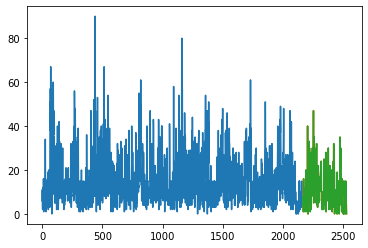

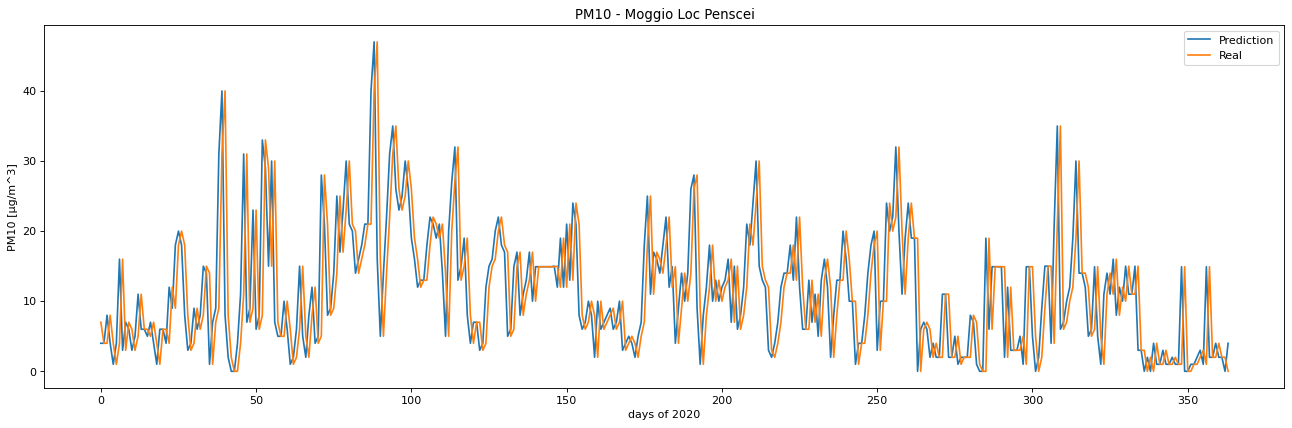

In [7]:
from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
from pandas import concat
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score


series = read_csv('/Users/davidguzman/Downloads/QuadrantiMoggio2.csv')

#find splitting points 

date_validation_split = '2018-12-31'
date_test_split = '2019-12-31'

validation_vector = series.iloc[:,1].apply(lambda x: x.startswith(date_validation_split))
validation_index =  series[validation_vector].index[0]

test_vector = series.iloc[:,1].apply(lambda x: x.startswith(date_test_split))
test_index =  series[test_vector].index[0]

# Create lagged dataset 
series = series.iloc[:,8]
#series = series.dropna()
series = series.fillna(series.mean())
    
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']

# split into train and test sets
X = dataframe.values
#train_size = int(len(X) * 0.66)
train_size = test_index
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]

# persistence model
def model_persistence(x):
  return x

# walk-forward validation
predictions = list()
for x in test_X:
  yhat = model_persistence(x)
  predictions.append(yhat)
MSE = mean_squared_error(test_y, predictions, squared = False)
MAE = mean_absolute_error(test_y, predictions)
R2 = r2_score(test_y, predictions)
print(test_y.shape, len(predictions))
print(series.name)
print('Test MSE: %.3f' % MSE)
print('Test MAE: %.3f' % MAE)
print('Test R2: %.3f' % R2)

# plot predictions and expected results
pyplot.plot(train_y)
pyplot.plot([None for i in train_y] + [x for x in test_y])
pyplot.plot([None for i in train_y] + [x for x in predictions])

from matplotlib.pyplot import figure
figure(figsize=(20, 6), dpi=80)

pyplot.plot(series[train_size:].reset_index().iloc[:,1], label = 'Prediction')
pyplot.plot(predictions, label = 'Real')
pyplot.legend()
pyplot.title(series.name+ ' - Moggio Loc Penscei')
pyplot.xlabel('days of 2020') 
pyplot.ylabel('PM10 [μg/m^3]') 
pyplot.show()

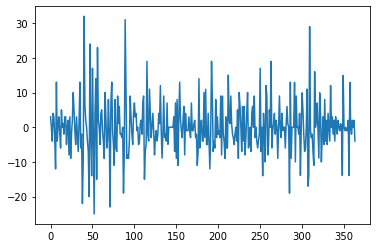

In [14]:
import numpy as np
rss = sum((predictions - test_y)**2)  ## residual sum of squares
tss = sum((test_y - np.mean(test_y))**2)  ## total sum of squares
rsq = 1 - rss/tss
rsq


pyplot.plot(predictions - test_y)
pyplot.show()

(364,) 364
Ammonia
Test MSE: 1.418
Test MAE: 0.811
Test R2: 0.720


/var/folders/pn/sswhj3651l545xrjmmzd77_h0000gn/T/ipykernel_12156/1410014049.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


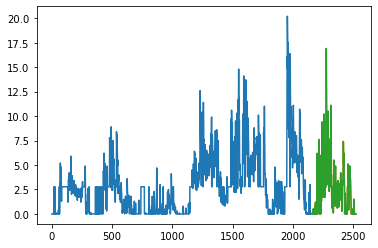

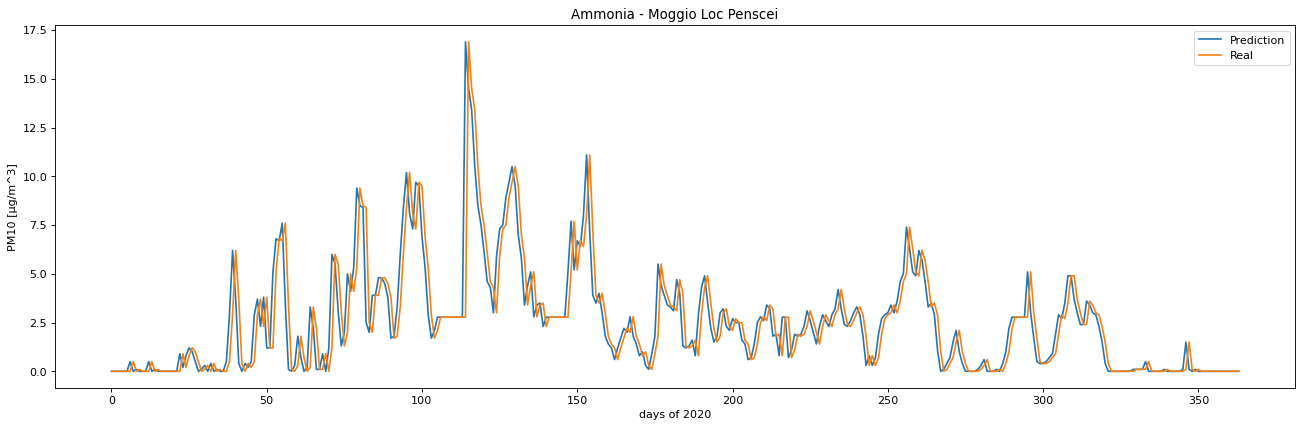

(364,) 364
NO2
Test MSE: 4.331
Test MAE: 2.646
Test R2: -0.516


/var/folders/pn/sswhj3651l545xrjmmzd77_h0000gn/T/ipykernel_12156/1410014049.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


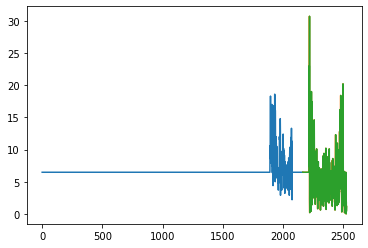

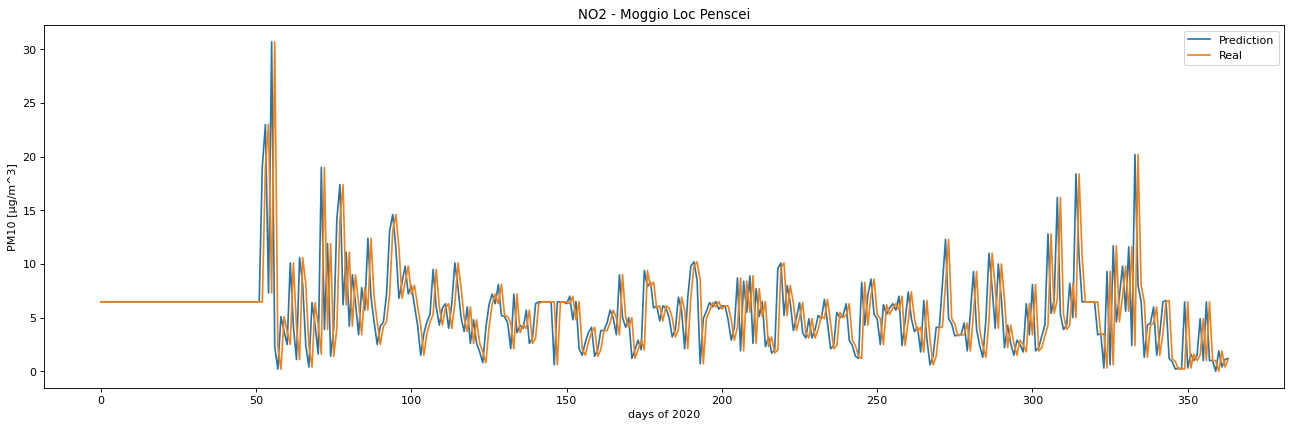

(364,) 364
NOx
Test MSE: 4.388
Test MAE: 2.651
Test R2: -0.381


/var/folders/pn/sswhj3651l545xrjmmzd77_h0000gn/T/ipykernel_12156/1410014049.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


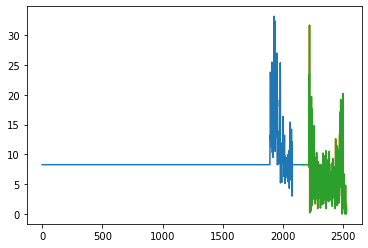

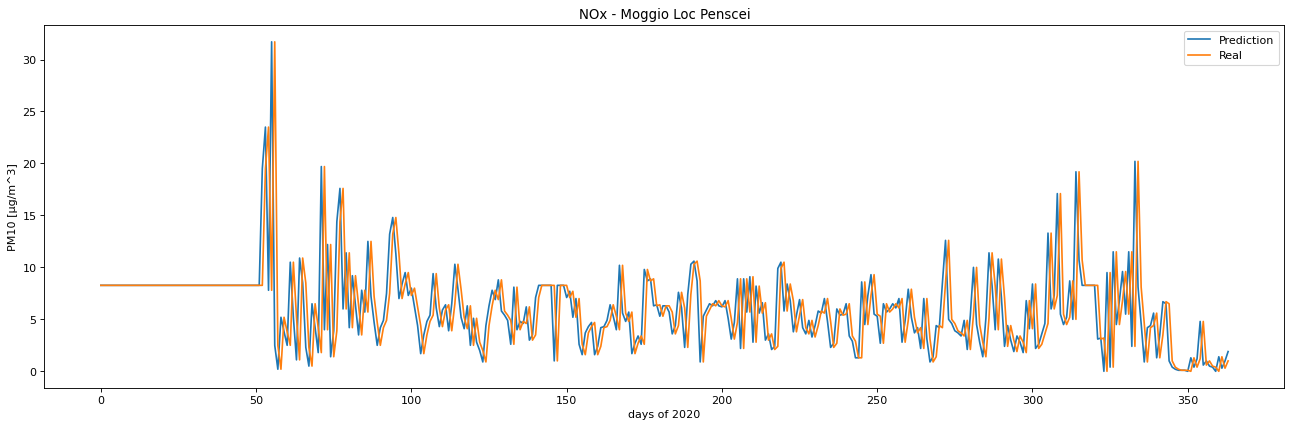

(364,) 364
Ozone
Test MSE: 22.339
Test MAE: 16.050
Test R2: 0.465


/var/folders/pn/sswhj3651l545xrjmmzd77_h0000gn/T/ipykernel_12156/1410014049.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


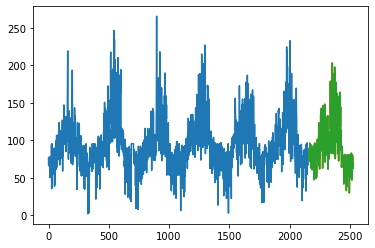

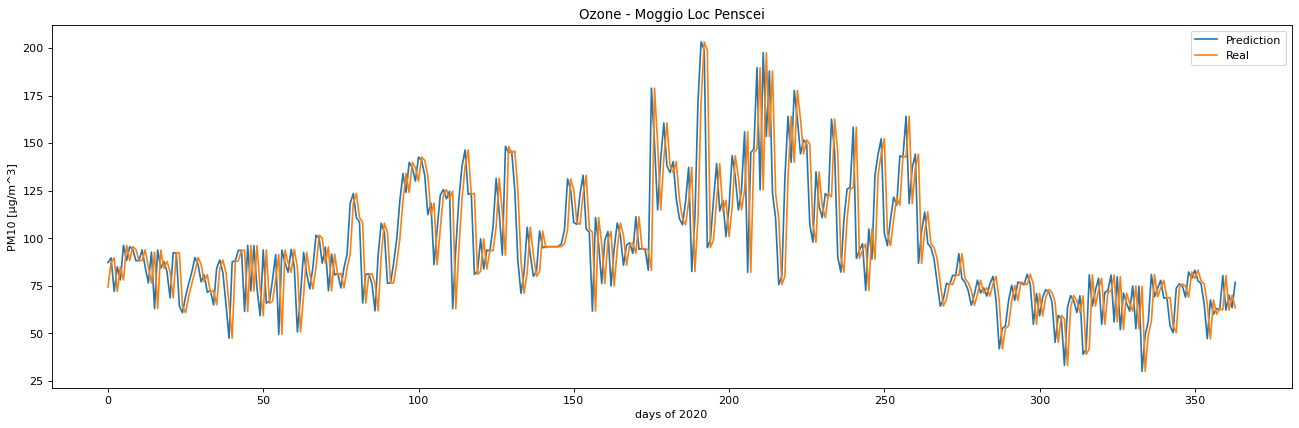

(364,) 364
PM10
Test MSE: 7.662
Test MAE: 5.456
Test R2: 0.156


/var/folders/pn/sswhj3651l545xrjmmzd77_h0000gn/T/ipykernel_12156/1410014049.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


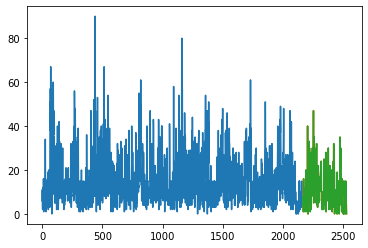

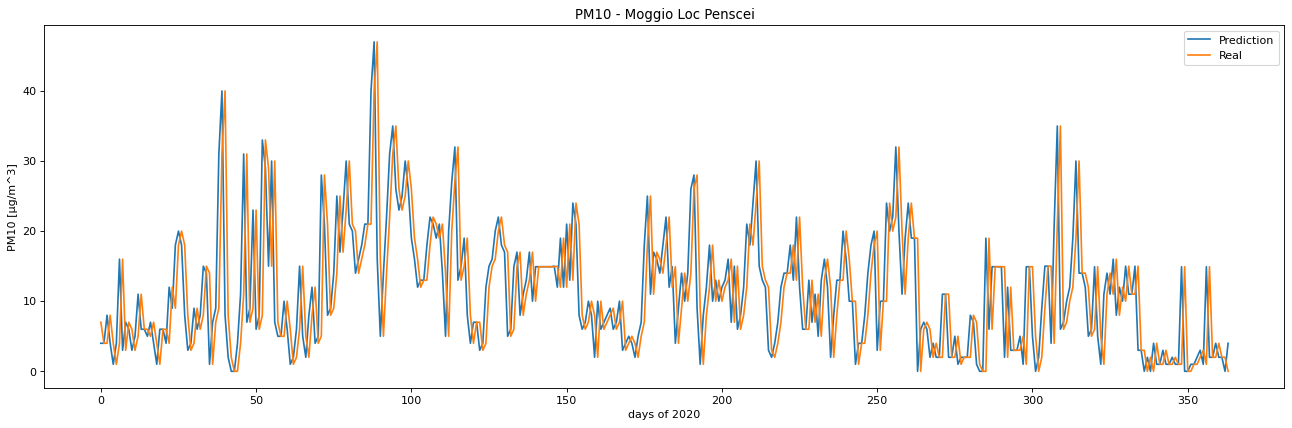

(364,) 364
PM25
Test MSE: 6.127
Test MAE: 4.380
Test R2: 0.208


/var/folders/pn/sswhj3651l545xrjmmzd77_h0000gn/T/ipykernel_12156/1410014049.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


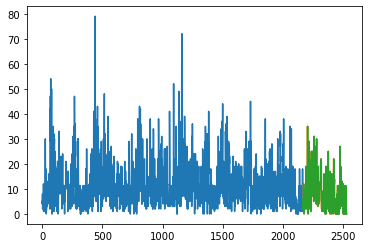

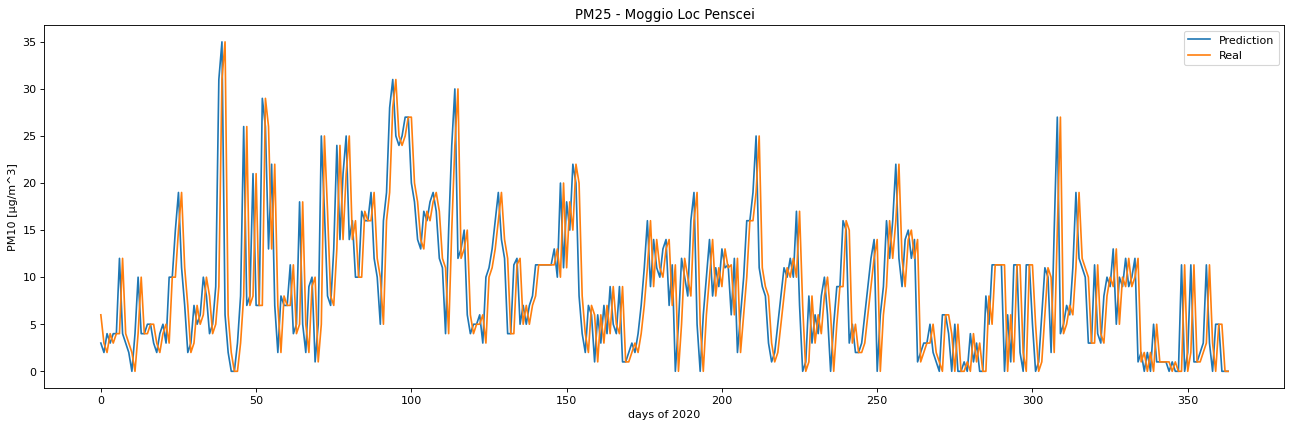

/var/folders/pn/sswhj3651l545xrjmmzd77_h0000gn/T/ipykernel_12156/1410014049.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


(364,) 364
Wind_speed
Test MSE: 0.456
Test MAE: 0.333
Test R2: -0.162


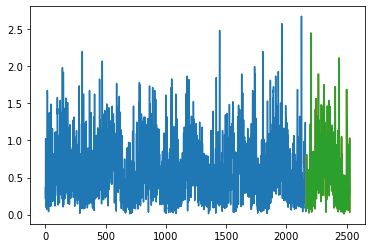

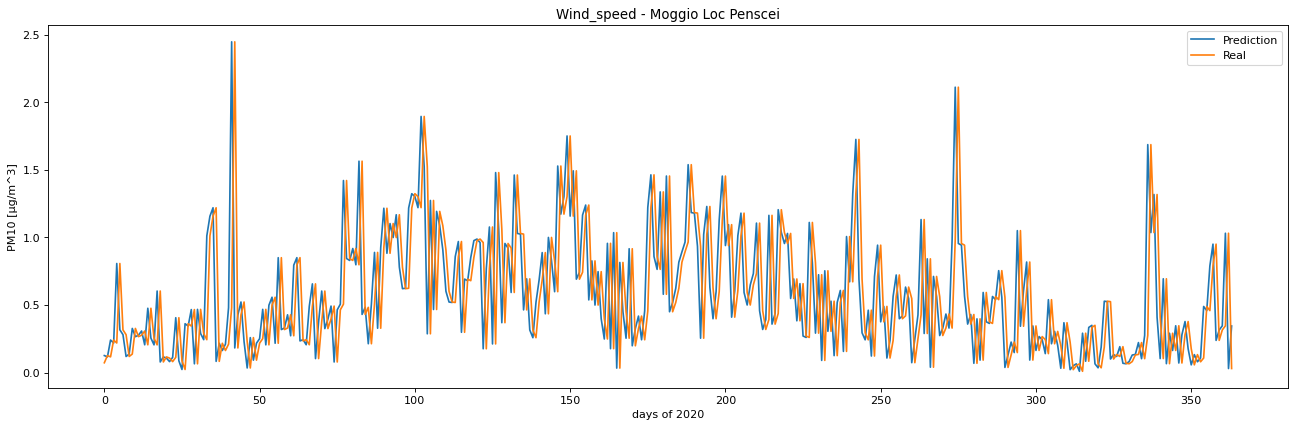

/var/folders/pn/sswhj3651l545xrjmmzd77_h0000gn/T/ipykernel_12156/1410014049.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


(364,) 364
Wind_direction
Test MSE: 4.878
Test MAE: 2.838
Test R2: 0.549


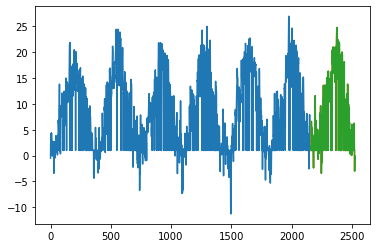

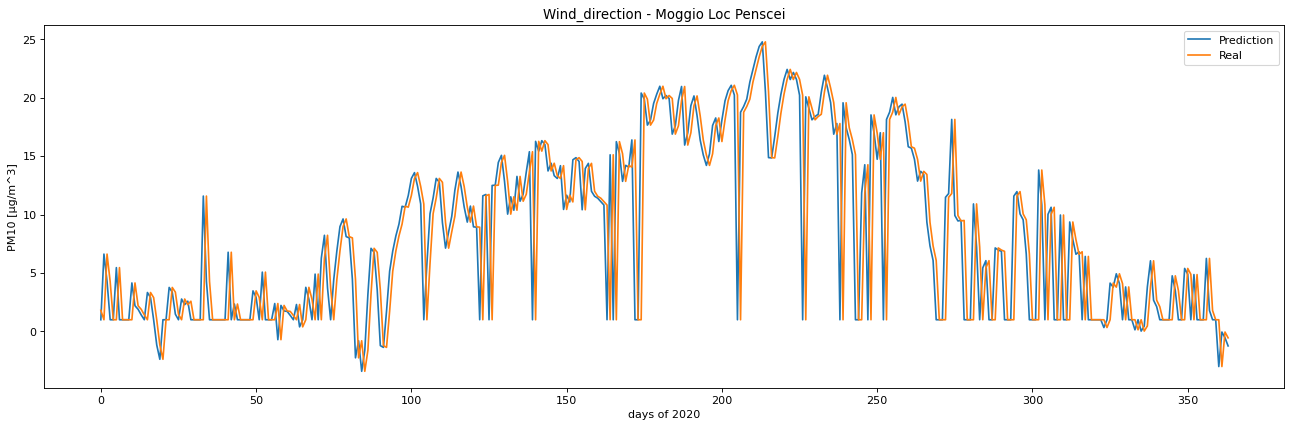

/var/folders/pn/sswhj3651l545xrjmmzd77_h0000gn/T/ipykernel_12156/1410014049.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


(364,) 364
Temperature
Test MSE: 34.430
Test MAE: 22.379
Test R2: -0.219


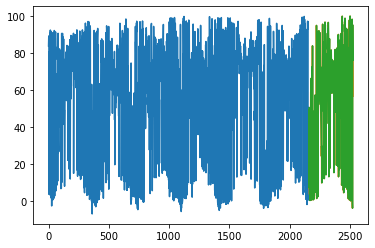

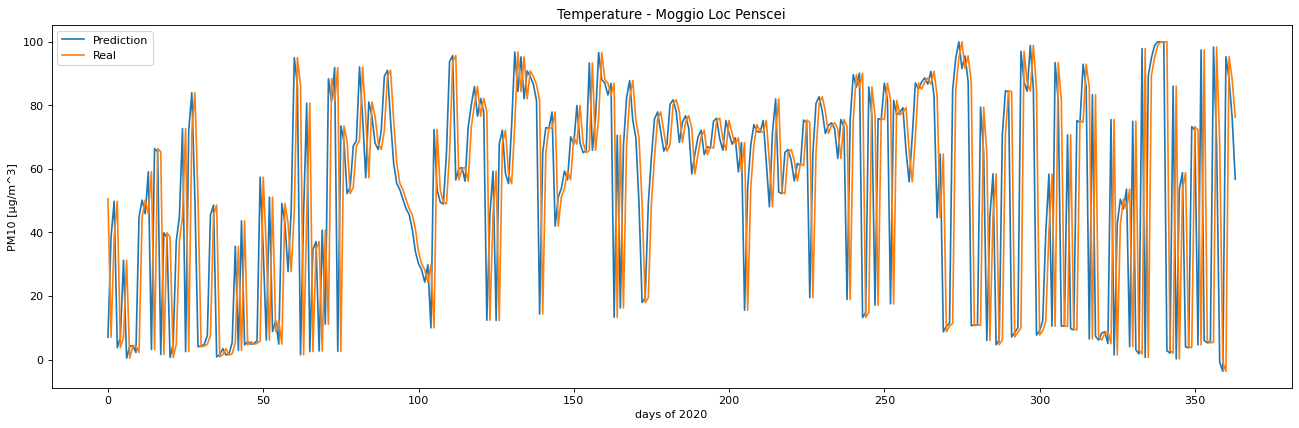

/var/folders/pn/sswhj3651l545xrjmmzd77_h0000gn/T/ipykernel_12156/1410014049.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


(364,) 364
Relative_humidity
Test MSE: 89.306
Test MAE: 61.045
Test R2: 0.286


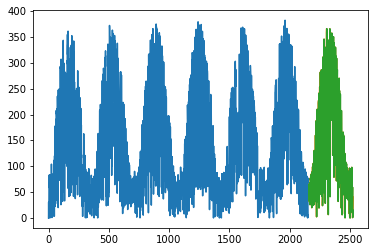

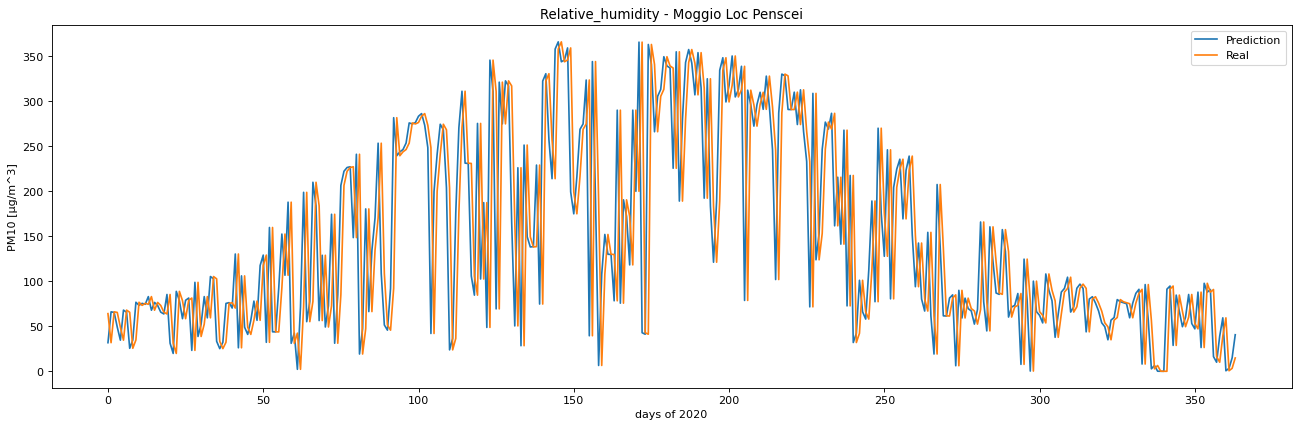

/var/folders/pn/sswhj3651l545xrjmmzd77_h0000gn/T/ipykernel_12156/1410014049.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


(364,) 364
Global_radiation
Test MSE: 79.505
Test MAE: 37.741
Test R2: -0.648


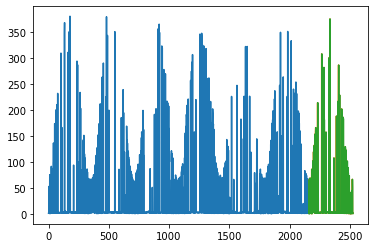

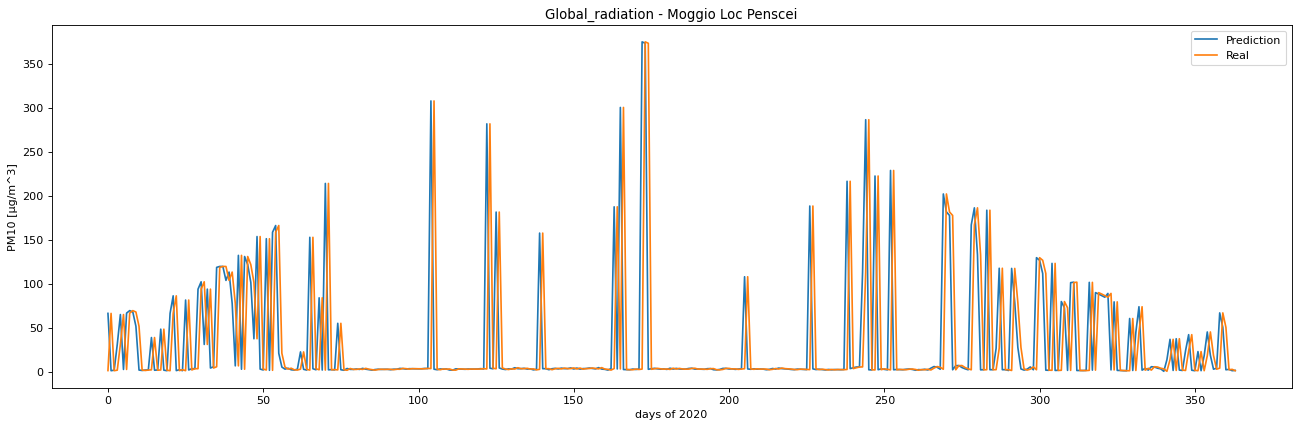

(364,) 364
Wind_speed_max
Test MSE: 96.859
Test MAE: 60.730
Test R2: -0.517


/var/folders/pn/sswhj3651l545xrjmmzd77_h0000gn/T/ipykernel_12156/1410014049.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


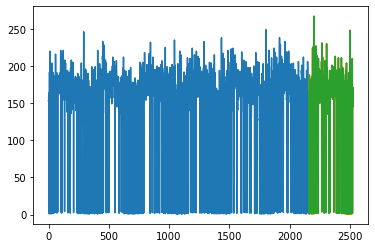

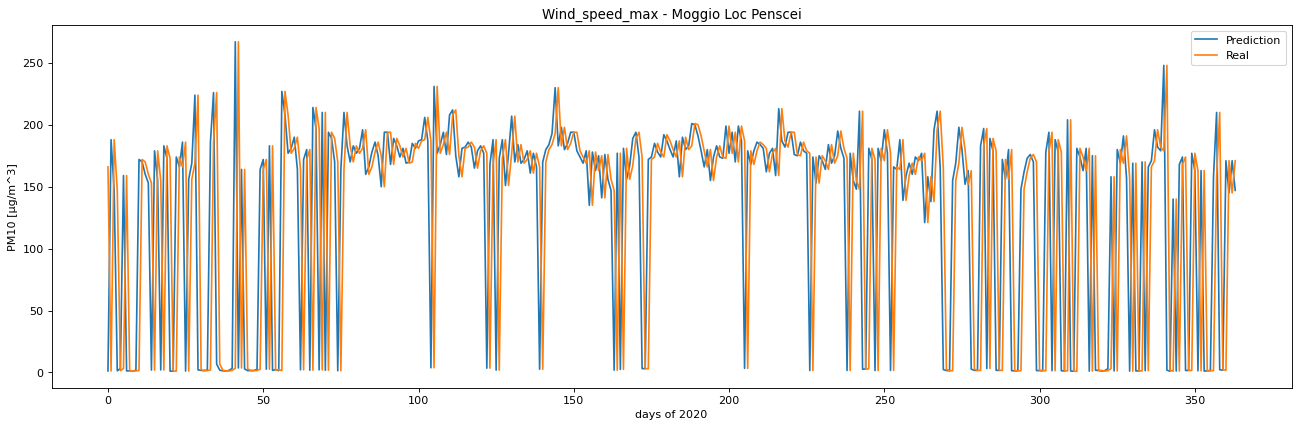

/var/folders/pn/sswhj3651l545xrjmmzd77_h0000gn/T/ipykernel_12156/1410014049.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


(364,) 364
Wind_direction_max
Test MSE: 86.453
Test MAE: 52.495
Test R2: -0.603


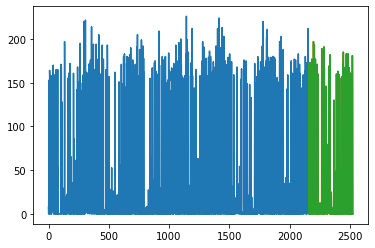

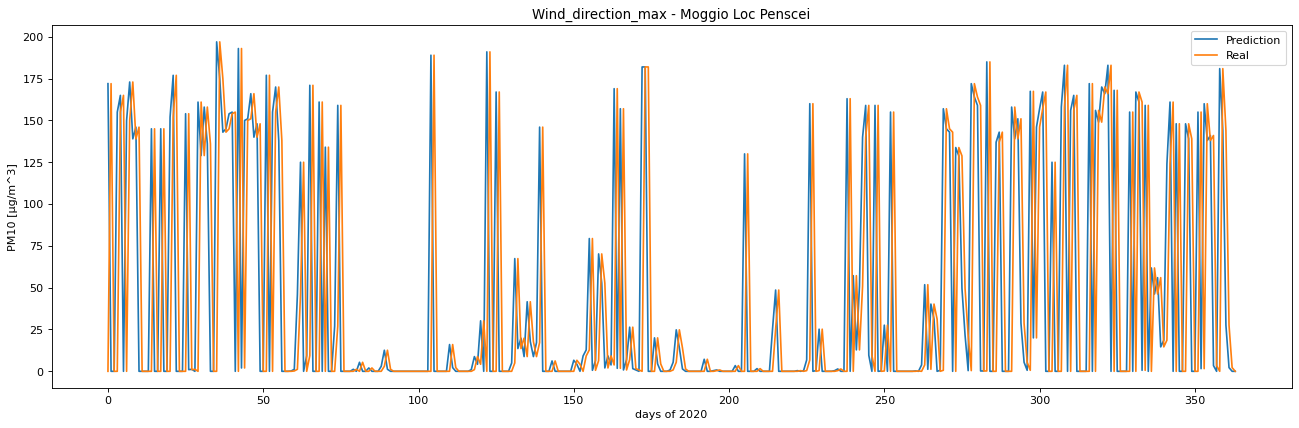

In [3]:
for i in range(4,17):
  from pandas import read_csv
  from pandas import datetime
  from pandas import DataFrame
  from pandas import concat
  from matplotlib import pyplot
  from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score


  series = read_csv('/Users/davidguzman/Downloads/QuadrantiMoggio2.csv')

  #find splitting points 

  date_validation_split = '2018-12-31'
  date_test_split = '2019-12-31'

  validation_vector = series.iloc[:,1].apply(lambda x: x.startswith(date_validation_split))
  validation_index =  series[validation_vector].index[0]

  test_vector = series.iloc[:,1].apply(lambda x: x.startswith(date_test_split))
  test_index =  series[test_vector].index[0]

  # Create lagged dataset 
  series = series.iloc[:,i]
  #series = series.dropna()
  series = series.fillna(series.mean())
      
  values = DataFrame(series.values)
  dataframe = concat([values.shift(1), values], axis=1)
  dataframe.columns = ['t-1', 't+1']

  # split into train and test sets
  X = dataframe.values
  #train_size = int(len(X) * 0.66)
  train_size = test_index
  train, test = X[1:train_size], X[train_size:]
  train_X, train_y = train[:,0], train[:,1]
  test_X, test_y = test[:,0], test[:,1]

  # persistence model
  def model_persistence(x):
    return x

  # walk-forward validation
  predictions = list()
  for x in test_X:
    yhat = model_persistence(x)
    predictions.append(yhat)
  MSE = mean_squared_error(test_y, predictions, squared = False)
  MAE = mean_absolute_error(test_y, predictions)
  R2 = r2_score(test_y, predictions)
  print(test_y.shape, len(predictions))
  print(series.name)
  print('Test MSE: %.3f' % MSE)
  print('Test MAE: %.3f' % MAE)
  print('Test R2: %.3f' % R2)

  # plot predictions and expected results
  pyplot.plot(train_y)
  pyplot.plot([None for i in train_y] + [x for x in test_y])
  pyplot.plot([None for i in train_y] + [x for x in predictions])

  from matplotlib.pyplot import figure
  figure(figsize=(20, 6), dpi=80)

  pyplot.plot(series[train_size:].reset_index().iloc[:,1], label = 'Prediction')
  pyplot.plot(predictions, label = 'Real')
  pyplot.legend()
  pyplot.title(series.name+ ' - Moggio Loc Penscei')
  pyplot.xlabel('days of 2020') 
  pyplot.ylabel('PM10 [μg/m^3]') 
  pyplot.show()

## Schivenolgia

(363,) 363
Ammonia
Test MSE: 24.134
Test MAE: 6.669
Test R2: -0.742


/var/folders/pn/sswhj3651l545xrjmmzd77_h0000gn/T/ipykernel_12156/1013413977.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


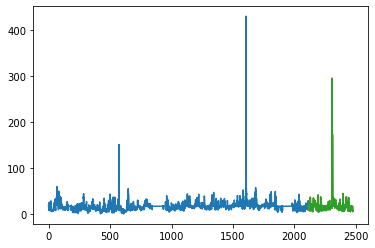

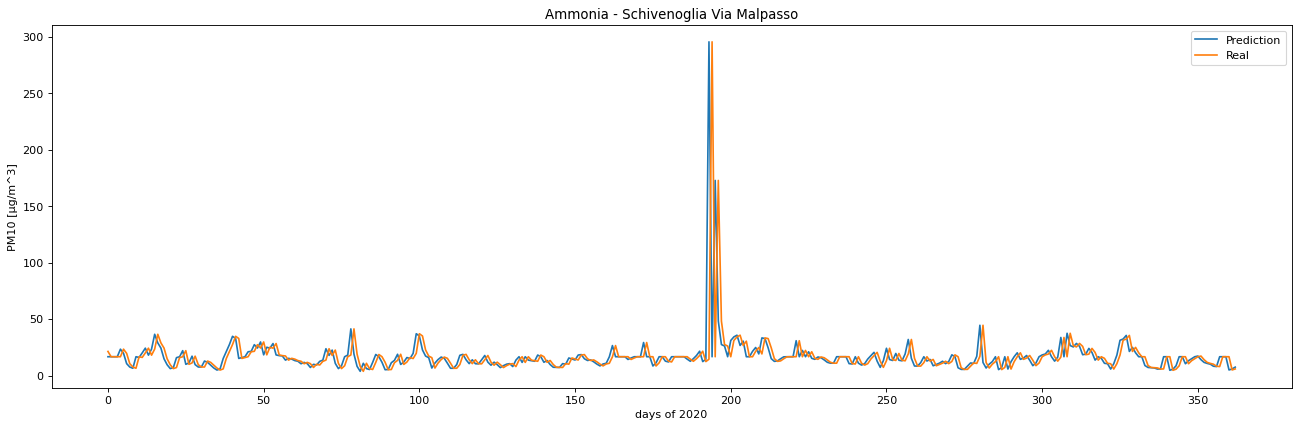

(363,) 363
CO
Test MSE: 0.133
Test MAE: 0.061
Test R2: 0.894


/var/folders/pn/sswhj3651l545xrjmmzd77_h0000gn/T/ipykernel_12156/1013413977.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


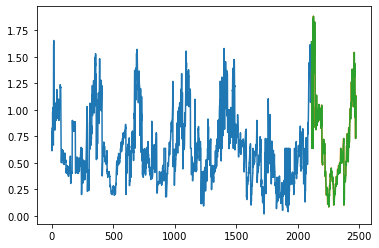

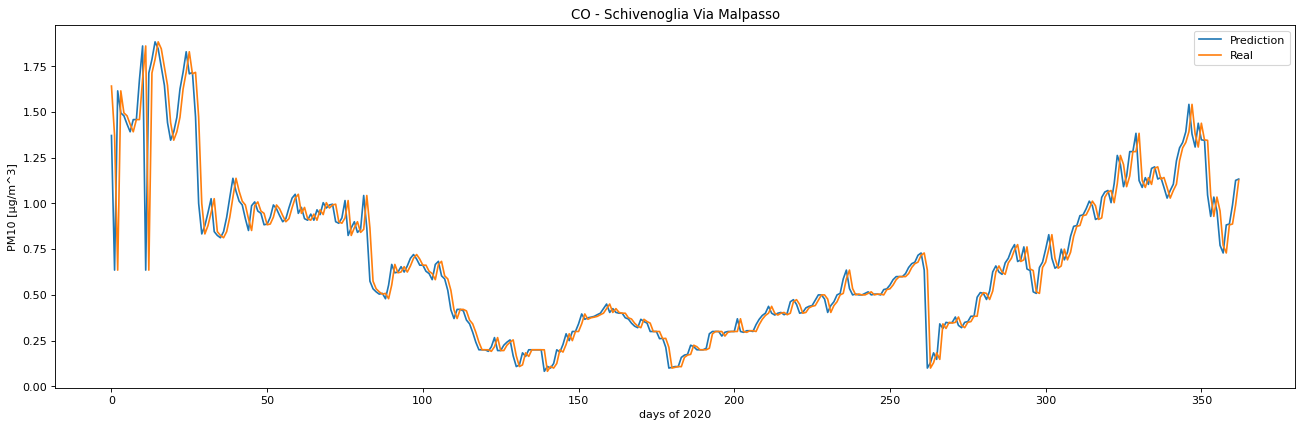

(363,) 363
NO2
Test MSE: 4.661
Test MAE: 3.516
Test R2: 0.704


/var/folders/pn/sswhj3651l545xrjmmzd77_h0000gn/T/ipykernel_12156/1013413977.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


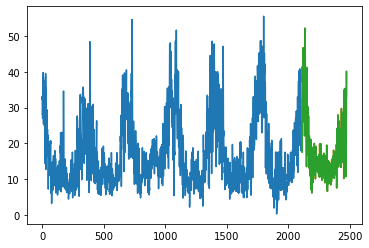

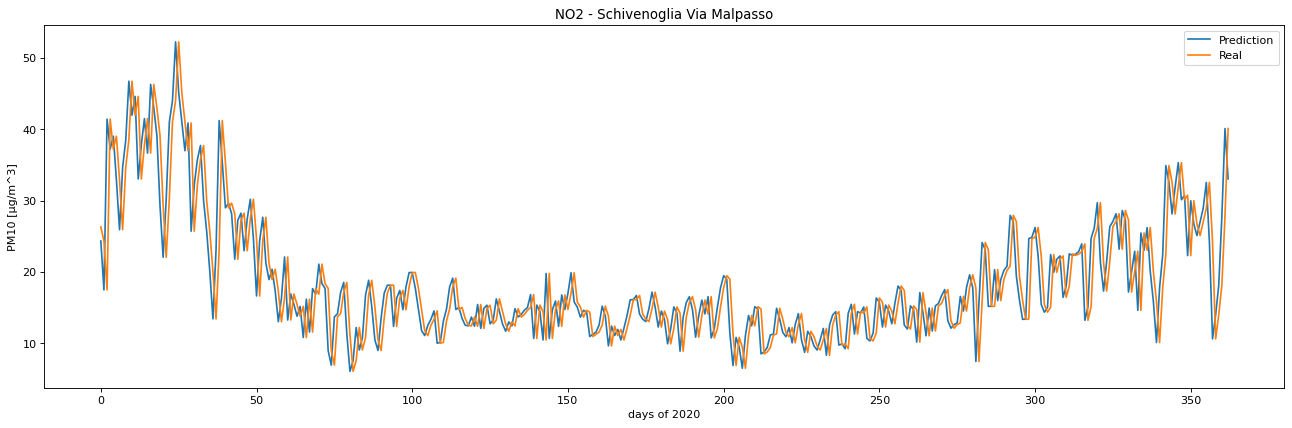

(363,) 363
NOx
Test MSE: 10.513
Test MAE: 6.711
Test R2: 0.713


/var/folders/pn/sswhj3651l545xrjmmzd77_h0000gn/T/ipykernel_12156/1013413977.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


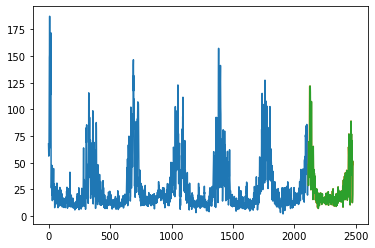

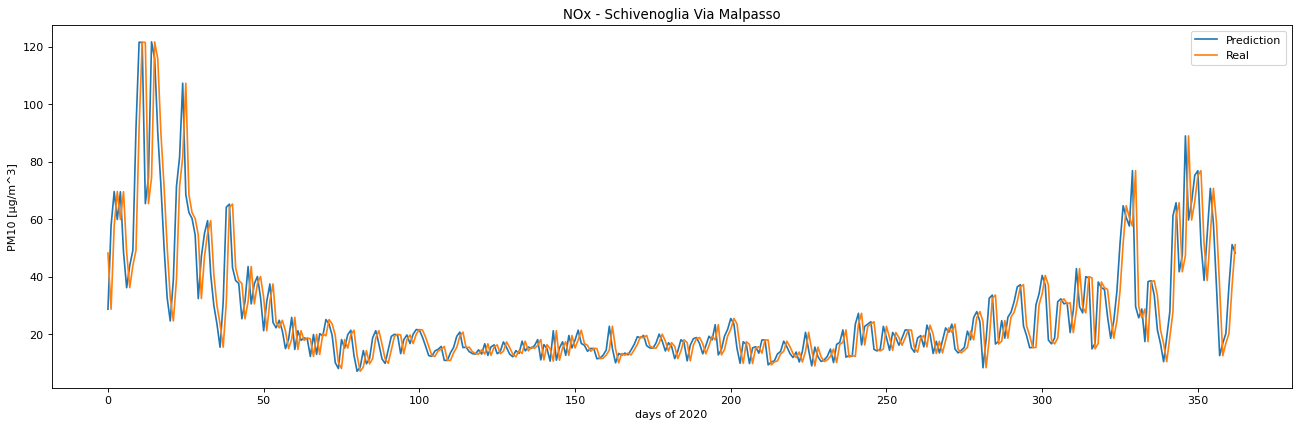

(363,) 363
Ozone
Test MSE: 12.622
Test MAE: 9.550
Test R2: 0.802


/var/folders/pn/sswhj3651l545xrjmmzd77_h0000gn/T/ipykernel_12156/1013413977.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


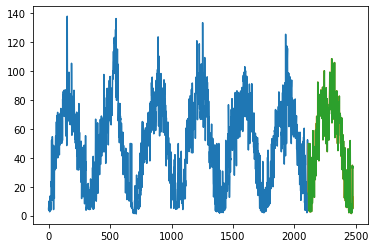

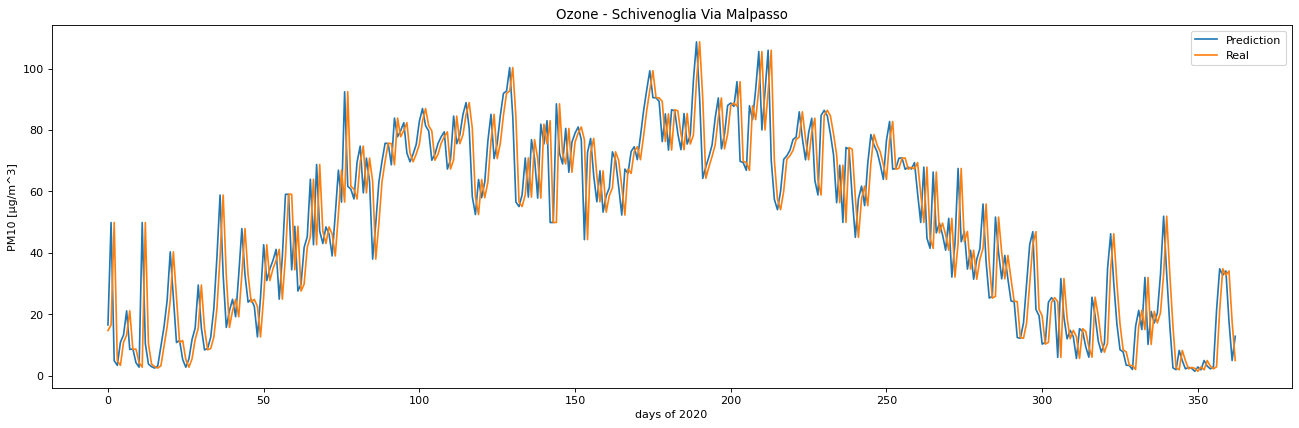

(363,) 363
PM10
Test MSE: 13.749
Test MAE: 9.606
Test R2: 0.430


/var/folders/pn/sswhj3651l545xrjmmzd77_h0000gn/T/ipykernel_12156/1013413977.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


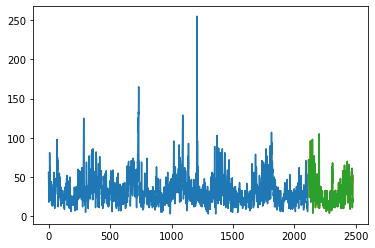

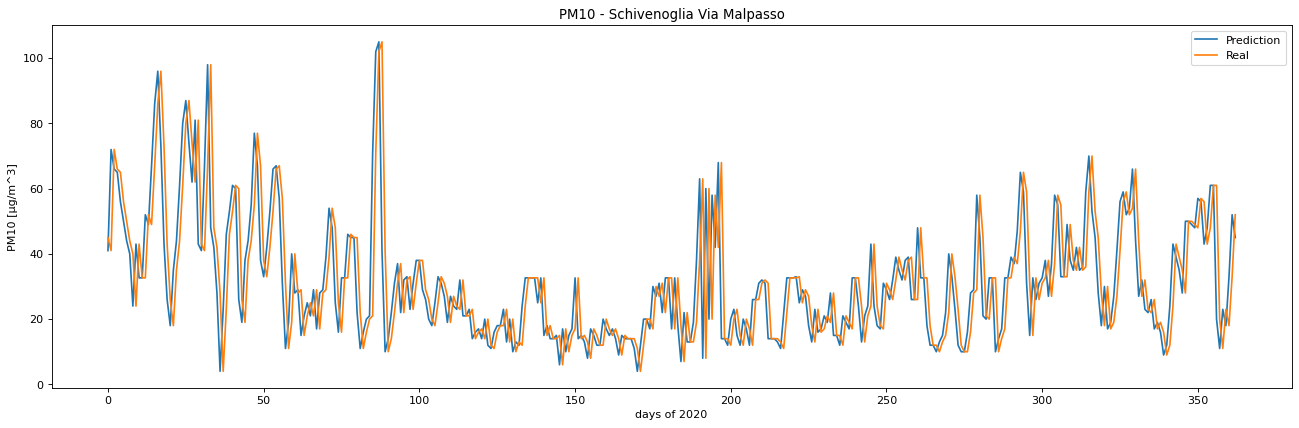

/var/folders/pn/sswhj3651l545xrjmmzd77_h0000gn/T/ipykernel_12156/1013413977.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


(363,) 363
PM25
Test MSE: 10.042
Test MAE: 7.308
Test R2: 0.556


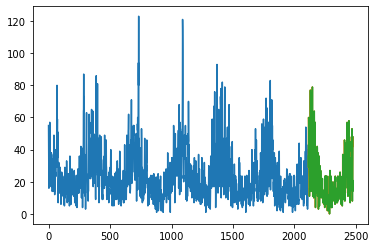

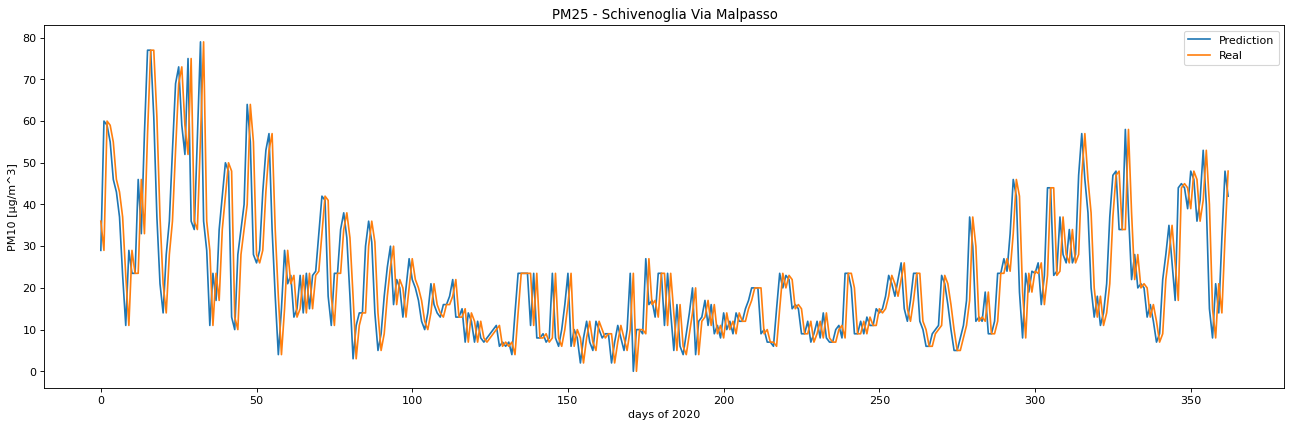

/var/folders/pn/sswhj3651l545xrjmmzd77_h0000gn/T/ipykernel_12156/1013413977.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


(363,) 363
Sulfur_dioxide
Test MSE: 0.807
Test MAE: 0.577
Test R2: 0.611


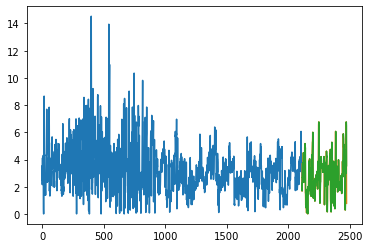

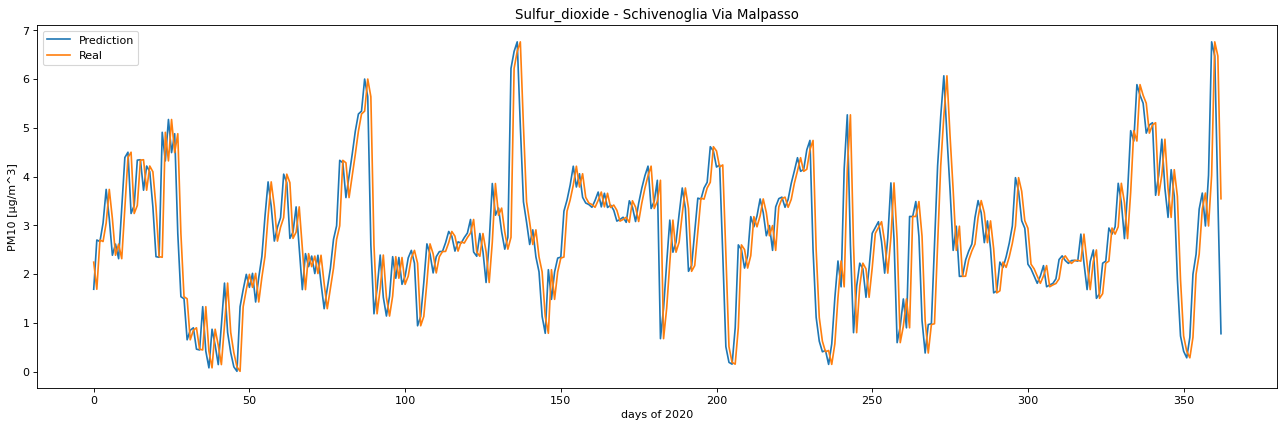

(363,) 363
Wind_speed
Test MSE: 1.136
Test MAE: 0.825
Test R2: -0.532


/var/folders/pn/sswhj3651l545xrjmmzd77_h0000gn/T/ipykernel_12156/1013413977.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


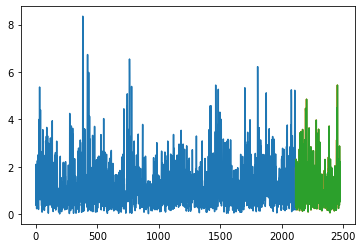

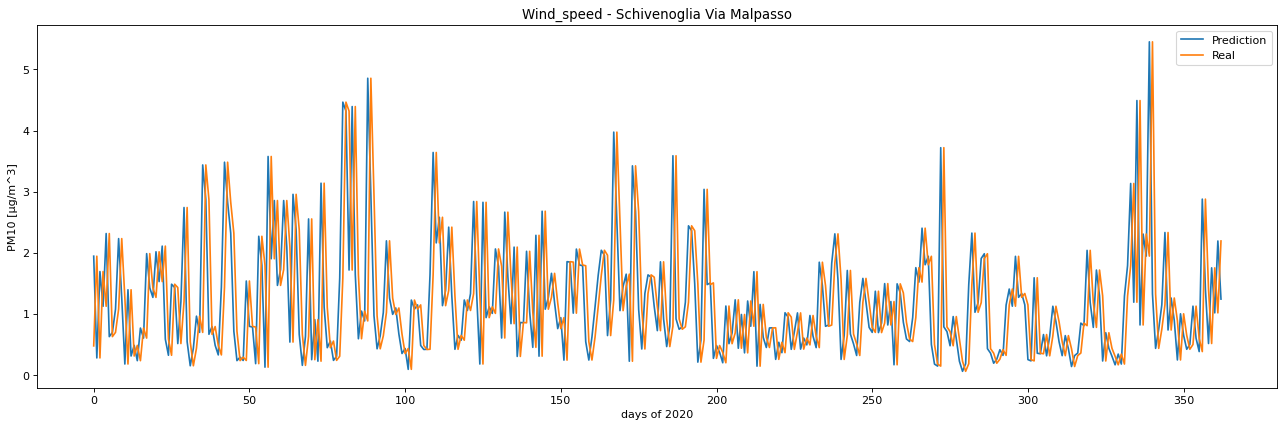

(363,) 363
Temperature
Test MSE: 1.654
Test MAE: 1.277
Test R2: 0.955


/var/folders/pn/sswhj3651l545xrjmmzd77_h0000gn/T/ipykernel_12156/1013413977.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


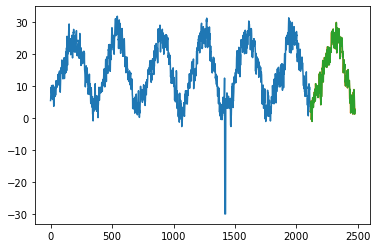

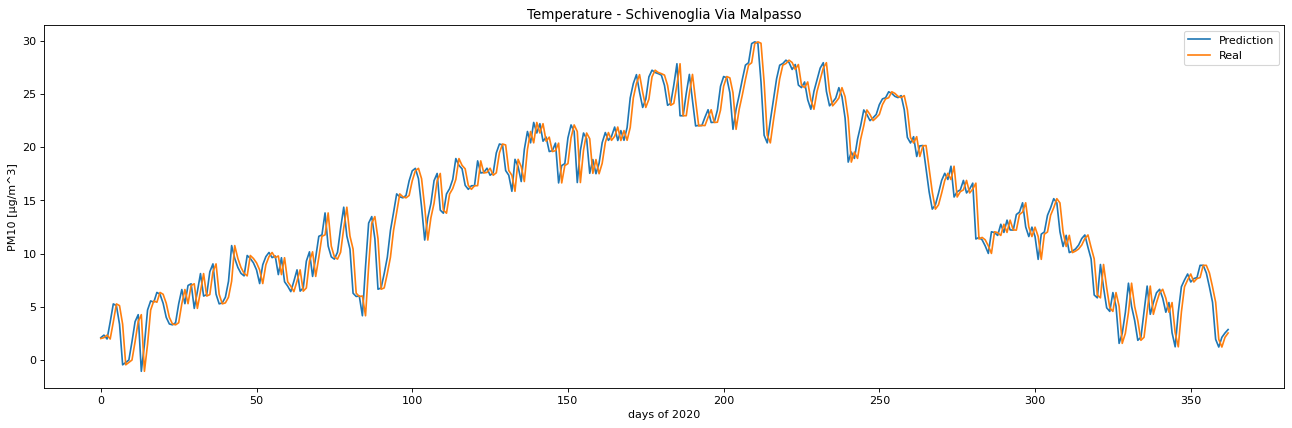

(363,) 363
Relative_humidity
Test MSE: 10.610
Test MAE: 7.227
Test R2: 0.663


/var/folders/pn/sswhj3651l545xrjmmzd77_h0000gn/T/ipykernel_12156/1013413977.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


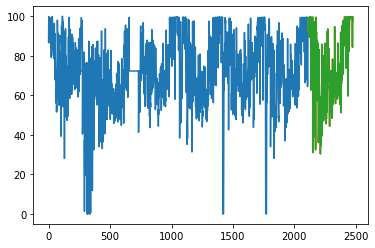

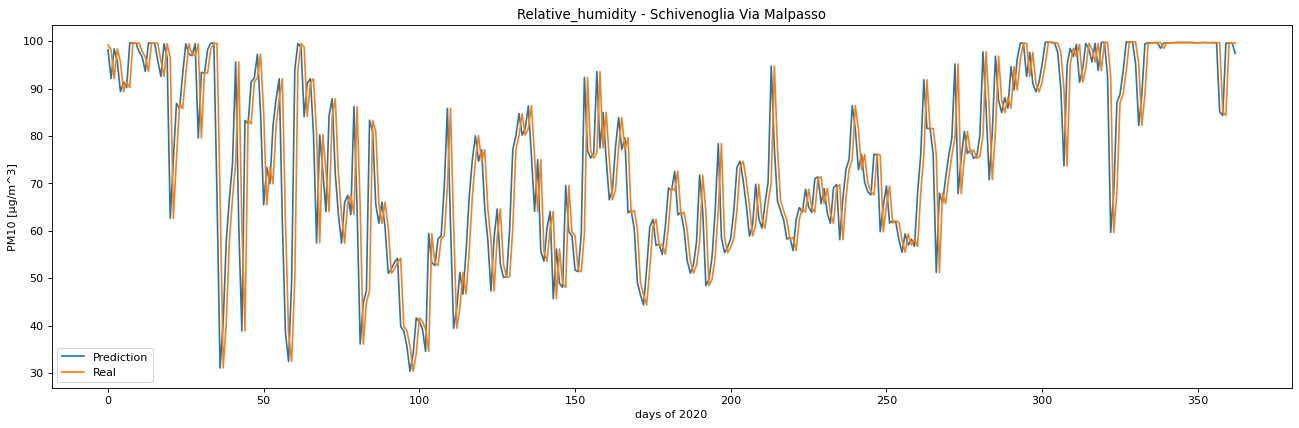

(363,) 363
Global_radiation
Test MSE: 62.257
Test MAE: 41.534
Test R2: 0.685


/var/folders/pn/sswhj3651l545xrjmmzd77_h0000gn/T/ipykernel_12156/1013413977.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


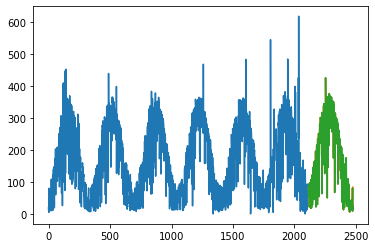

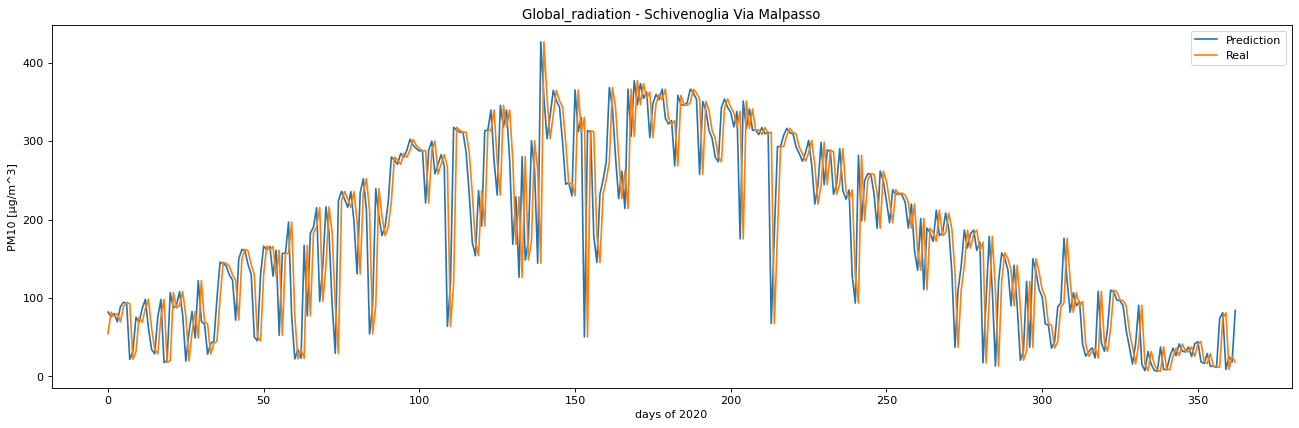

/var/folders/pn/sswhj3651l545xrjmmzd77_h0000gn/T/ipykernel_12156/1013413977.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


(363,) 363
Rainfall
Test MSE: 6.743
Test MAE: 2.435
Test R2: -0.815


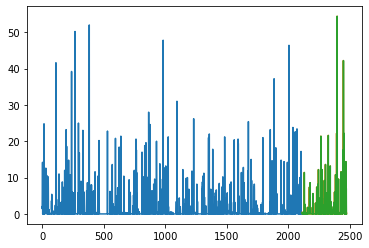

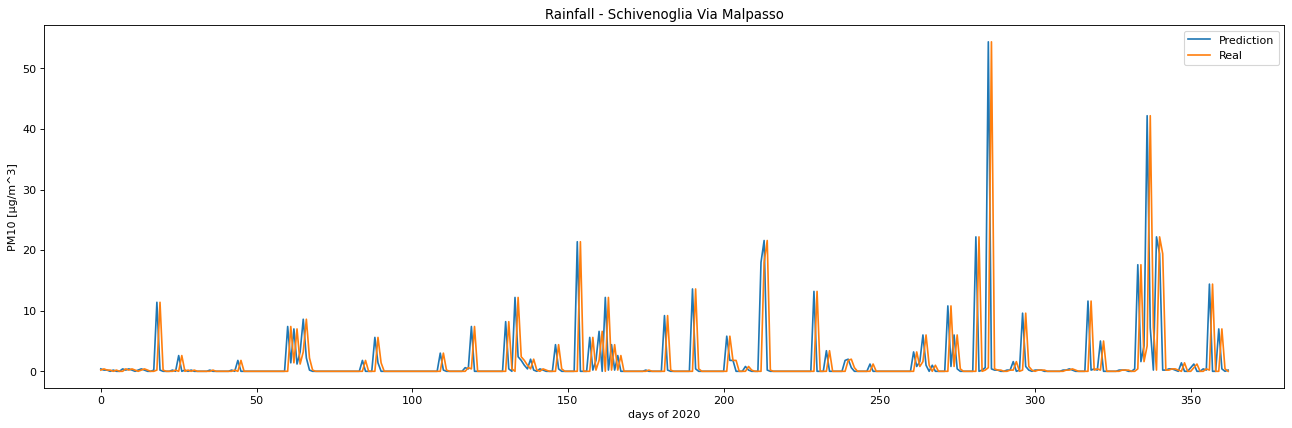

In [4]:
for i in range(4,17):
  from pandas import read_csv
  from pandas import datetime
  from pandas import DataFrame
  from pandas import concat
  from matplotlib import pyplot
  from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score


  series = read_csv('/Users/davidguzman/Downloads/QuadrantiSchivenoglia.csv')

  #find splitting points 

  date_validation_split = '2018-12-31'
  date_test_split = '2019-12-30'

  validation_vector = series.iloc[:,3].apply(lambda x: x.startswith(date_validation_split))
  validation_index =  series[validation_vector].index[0]

  test_vector = series.iloc[:,3].apply(lambda x: x.startswith(date_test_split))
  test_index =  series[test_vector].index[0]

  # Create lagged dataset 
  series = series.iloc[:,i]
  #series = series.dropna()
  series = series.fillna(series.mean())
      
  values = DataFrame(series.values)
  dataframe = concat([values.shift(1), values], axis=1)
  dataframe.columns = ['t-1', 't+1']

  # split into train and test sets
  X = dataframe.values
  #train_size = int(len(X) * 0.66)
  train_size = test_index
  train, test = X[1:train_size], X[train_size:]
  train_X, train_y = train[:,0], train[:,1]
  test_X, test_y = test[:,0], test[:,1]

  # persistence model
  def model_persistence(x):
    return x

  # walk-forward validation
  predictions = list()
  for x in test_X:
    yhat = model_persistence(x)
    predictions.append(yhat)
  MSE = mean_squared_error(test_y, predictions, squared = False)
  MAE = mean_absolute_error(test_y, predictions)
  R2 = r2_score(test_y, predictions)
  print(test_y.shape, len(predictions))
  print(series.name)
  print('Test MSE: %.3f' % MSE)
  print('Test MAE: %.3f' % MAE)
  print('Test R2: %.3f' % R2)

  # plot predictions and expected results
  pyplot.plot(train_y)
  pyplot.plot([None for i in train_y] + [x for x in test_y])
  pyplot.plot([None for i in train_y] + [x for x in predictions])

  from matplotlib.pyplot import figure
  figure(figsize=(20, 6), dpi=80)

  pyplot.plot(series[train_size:].reset_index().iloc[:,1], label = 'Prediction')
  pyplot.plot(predictions, label = 'Real')
  pyplot.legend()
  pyplot.title(series.name + ' - Schivenoglia Via Malpasso')
  pyplot.xlabel('days of 2020') 
  pyplot.ylabel('PM10 [μg/m^3]') 
  pyplot.show()